# 目的
以下を計算する
- trainの単語数
- Tagの種類

In [1]:
import polars as pl
import matplotlib.pyplot as plt

In [2]:
train = pl.read_json("../data/train.json")
test = pl.read_json("../data/test.json")

In [3]:
train

document,full_text,tokens,trailing_whitespace,labels
i64,str,list[str],list[bool],list[str]
7,"""Design Thinkin…","[""Design"", ""Thinking"", … "" ""]","[true, true, … false]","[""O"", ""O"", … ""O""]"
10,"""Diego Estrada …","[""Diego"", ""Estrada"", … "" ""]","[true, false, … false]","[""B-NAME_STUDENT"", ""I-NAME_STUDENT"", … ""O""]"
16,"""Reporting proc…","[""Reporting"", ""process"", … "" ""]","[true, false, … false]","[""O"", ""O"", … ""O""]"
20,"""Design Thinkin…","[""Design"", ""Thinking"", … "" ""]","[true, true, … false]","[""O"", ""O"", … ""O""]"
56,"""Assignment: V…","[""Assignment"", "":"", … "" ""]","[false, false, … false]","[""O"", ""O"", … ""O""]"
86,"""Cheese Startup…","[""Cheese"", ""Startup"", … "" ""]","[true, true, … false]","[""O"", ""O"", … ""O""]"
93,"""Silvia Villalo…","[""Silvia"", ""Villalobos"", … "" ""]","[true, false, … false]","[""B-NAME_STUDENT"", ""I-NAME_STUDENT"", … ""O""]"
104,"""Storytelling …","[""Storytelling"", "" "", … "" ""]","[true, false, … false]","[""O"", ""O"", … ""O""]"
112,"""Reflection – L…","[""Reflection"", ""–"", … "" ""]","[true, true, … false]","[""O"", ""O"", … ""O""]"


# trainの単語数

In [28]:
# tokens列のlistの長さをカウント
token_lens = (
    train.get_column("tokens").map_elements(lambda tokens: len(tokens)).to_list()
)

Text(0, 0.5, 'token length')

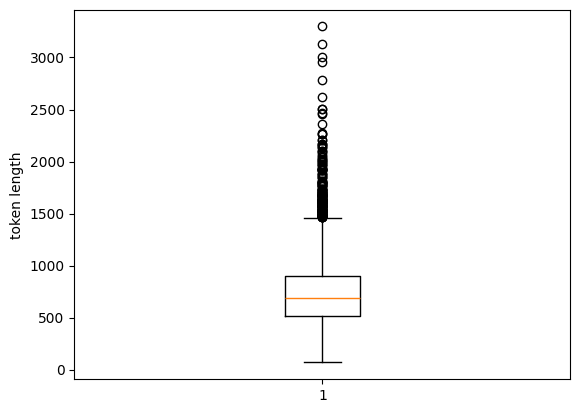

In [29]:
plt.boxplot(token_lens)
plt.ylabel("token length")

In [30]:
train.select(
    pl.col("tokens").map_elements(lambda tokens: len(tokens)).alias("token_length")
).describe()

describe,token_length
str,f64
"""count""",6807.0
"""null_count""",0.0
"""mean""",733.441017
"""std""",319.244697
"""min""",69.0
"""25%""",520.0
"""50%""",693.0
"""75%""",897.0
"""max""",3298.0


# Tagの種類

In [31]:
# 全tagのリスト
import itertools

all_tags = list(itertools.chain.from_iterable(train.get_column("labels").to_list()))

In [32]:
train.shape

(6807, 5)

In [37]:
# labelsの中に、"STREET"が含まれるかどうか"
train.filter(pl.col("labels").map_elements(lambda labels: "B-STREET_ADDRESS" in labels))

/var/folders/4p/kqrm_mh10fn2pjkrxfzxh03c0000gq/T/ipykernel_65990/853694294.py:3: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("labels").map_elements(lambda labels: ...)
with this one instead:
  + 'B-STREET_ADDRESS'.is_in(pl.col("labels"))

  pl.col("labels").map_elements(lambda labels: "B-STREET_ADDRESS" in labels)


document,full_text,tokens,trailing_whitespace,labels
i64,str,list[str],list[bool],list[str]
9854,"""Waseem Mabunda…","[""Waseem"", ""Mabunda"", … "" ""]","[true, true, … false]","[""B-NAME_STUDENT"", ""I-NAME_STUDENT"", … ""O""]"
11442,"""Reflection – L…","[""Reflection"", ""–"", … "" ""]","[true, true, … false]","[""O"", ""O"", … ""O""]"


In [40]:
# labelsの中に、"STREET"が含まれるかどうか"
train.filter(pl.col("labels").map_elements(lambda labels: "I-URL_PERSONAL" in labels))

/var/folders/4p/kqrm_mh10fn2pjkrxfzxh03c0000gq/T/ipykernel_65990/2224149912.py:3: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("labels").map_elements(lambda labels: ...)
with this one instead:
  + 'I-URL_PERSONAL'.is_in(pl.col("labels"))

  pl.col("labels").map_elements(lambda labels: "I-URL_PERSONAL" in labels)


document,full_text,tokens,trailing_whitespace,labels
i64,str,list[str],list[bool],list[str]
3202,"""Final Assignme…","[""Final"", ""Assignment"", … "" ""]","[true, false, … false]","[""O"", ""O"", … ""O""]"


In [74]:
import polars as pl
from collections import Counter

all_tags_count = Counter(all_tags)

In [75]:
all_tags_count

Counter({'O': 4989794,
         'B-NAME_STUDENT': 1365,
         'I-NAME_STUDENT': 1096,
         'B-URL_PERSONAL': 110,
         'B-ID_NUM': 78,
         'B-EMAIL': 39,
         'I-STREET_ADDRESS': 20,
         'I-PHONE_NUM': 15,
         'B-USERNAME': 6,
         'B-PHONE_NUM': 6,
         'B-STREET_ADDRESS': 2,
         'I-URL_PERSONAL': 1,
         'I-ID_NUM': 1})

In [77]:
total = sum(all_tags_count.values())

In [78]:
# 各要素の割合を計算
percentages = {
    element: (all_tags_count[element] / total) * 100 for element in all_tags_count
}

print(percentages)

{'O': 99.94513806919252, 'B-NAME_STUDENT': 0.02734083079671181, 'I-NAME_STUDENT': 0.02195278428805578, 'B-URL_PERSONAL': 0.002203290393874212, 'B-EMAIL': 0.000781166594191766, 'B-ID_NUM': 0.001562333188383532, 'I-URL_PERSONAL': 2.0029912671583742e-05, 'B-USERNAME': 0.00012017947602950247, 'B-PHONE_NUM': 0.00012017947602950247, 'I-PHONE_NUM': 0.00030044869007375615, 'B-STREET_ADDRESS': 4.0059825343167485e-05, 'I-STREET_ADDRESS': 0.00040059825343167485, 'I-ID_NUM': 2.0029912671583742e-05}


In [65]:
# all_tags_countの結果から割合を計算
all_tags_count / sum(all_tags_count.values())

TypeError: unsupported operand type(s) for /: 'Counter' and 'int'

In [42]:
label_names = [
    "B-NAME_STUDENT",
    "I-NAME_STUDENT",
    "B-EMAIL",
    "I-EMAIL",
    "B-USERNAME",
    "I-USERNAME",
    "B-ID_NUM",
    "I-ID_NUM",
    "B-PHONE_NUM",
    "I-PHONE_NUM",
    "B-URL_PERSONAL",
    "I-URL_PERSONAL",
    "B-STREET_ADDRESS",
    "I-STREET_ADDRESS",
    "O",
]

In [45]:
def count_tag(labels: list[str], label_names: list[str]) -> dict[str, int]:
    label_count = {label_name: 0 for label_name in label_names}
    for label in labels:
        label_count[label] += 1
    return label_count

In [47]:
train.select(
    pl.col("labels")
    .map_elements(lambda labels: count_tag(labels, label_names))
    .alias("label_count")
)

label_count
struct[15]
"{3,3,0,0,0,0,0,0,0,0,0,0,0,0,747}"
"{2,2,0,0,0,0,0,0,0,0,0,0,0,0,559}"
"{1,1,0,0,0,0,0,0,0,0,0,0,0,0,727}"
"{1,1,0,0,0,0,0,0,0,0,0,0,0,0,1069}"
"{1,1,0,0,0,0,0,0,0,0,0,0,0,0,1925}"
"{1,1,0,0,0,0,0,0,0,0,0,0,0,0,440}"
"{1,1,0,0,0,0,0,0,0,0,0,0,0,0,223}"
"{1,1,0,0,0,0,0,0,0,0,0,0,0,0,564}"
"{1,1,0,0,0,0,0,0,0,0,0,0,0,0,533}"


In [ ]:
# 全tokenに対するラベルの数を数えた棒グラフ

In [ ]:
# 各文章ごとに登場するtokenの割合の平均